In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
FRAME_LENGTH = 30

In [3]:
data_folder = Path('./data')
classes = list(data_folder.iterdir())
classes

[PosixPath('data/running'),
 PosixPath('data/stairs'),
 PosixPath('data/walking'),
 PosixPath('data/idle')]

In [4]:
dfs = []
def flatten_sensor_frame(df): return df.values.flatten()
data_list = []
for class_folder in classes:
    for file in class_folder.iterdir():
        df = pd.read_csv(file)

        frame = flatten_sensor_frame(df)
        record = list((frame)) + [str(class_folder)]
        data_list.append(record)
        
        df['label'] = class_folder
        dfs.append(df)

    
cols = [str(i) for i in range(90)] + ['label']
full_df = pd.DataFrame(data=data_list, columns=cols)

In [49]:
df = full_df[(full_df.label == 'data/walking') | (full_df.label == 'data/stairs')].copy().reset_index(drop=True)
df['is_stairs'] = df['label'] == 'data/stairs'

In [50]:
from sklearn.model_selection import StratifiedKFold

In [51]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [52]:
X = df[[str(i) for i in range(90)] ]
y = df['is_stairs']

In [53]:
X_orig = X.copy()
y_orig = y.copy()

In [289]:
from sklearn import svm
from sklearn.metrics import f1_score, confusion_matrix

In [163]:
X = df[[str(i) for i in range(90)] ]
y = df['is_stairs']

f_scores = []

for train_ix, valid_ix in kfold.split(X, y):
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    print(X_train.shape)
    cls = svm.SVC()
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_valid)
    f_scores.append(f1_score(y_valid, y_pred))
    
print(f'F1 score mean: {round(np.mean(f_scores), 2)}, std: {round(np.std(f_scores), 2)}')

(1612, 90)
(1612, 90)
(1612, 90)
(1612, 90)
(1612, 90)
F1 score mean: 0.64, std: 0.07


In [12]:
X_dev = X[:5]
y_dev = y[:5]

In [13]:
X_dev

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.675165,-11.607090,-2.662352,-1.278504,-2.700659,0.924162,-4.424484,-10.726024,-1.082179,0.646435,...,-0.330400,-7.350199,-12.670115,-1.460463,3.969586,-6.320692,9.255983,1.747767,2.920926,7.910443
1,2.264915,-9.931149,-4.659116,0.991200,-10.903194,-8.183381,2.226608,-8.044517,-2.341529,-1.647211,...,-2.202665,-3.102885,-4.644751,-2.456451,0.282516,-9.251195,-0.933739,-3.208230,-4.711789,0.885855
2,1.431733,-8.274360,-1.738190,-1.786074,-7.996633,-3.327940,0.885855,-11.468226,5.544971,-0.770933,...,-2.059013,3.466804,-5.406107,-2.633622,0.057461,-6.445191,-3.069367,5.880160,-6.900089,-3.509899
3,-0.124498,-9.442732,-0.842759,2.657564,-10.381259,0.665588,1.383849,-16.093824,-1.479617,1.771709,...,15.011644,6.871359,-2.738967,11.865664,5.521029,-0.158017,10.165780,3.394978,0.090980,5.243302
4,-6.478709,-22.160730,0.162806,5.272033,-25.546135,-8.652645,-2.264915,-17.348385,-2.834735,-7.426813,...,-0.866701,-1.958457,-8.978256,-4.625597,0.196325,-2.643199,-0.114922,-1.728614,-4.994304,-1.192312


In [14]:
x_acc_cols = [str(i) for i in range(0,89,3)]
y_acc_cols = [str(i) for i in range(1,89,3)]
z_acc_cols = [str(i) for i in range(2,90,3)]

In [16]:
classes

[PosixPath('data/running'),
 PosixPath('data/stairs'),
 PosixPath('data/walking'),
 PosixPath('data/idle')]

In [17]:
dfs = []
def flatten_sensor_frame(df): return df.values.flatten()
for class_folder in [Path('./data/stairs'), Path('./data/walking')]:
    for file in class_folder.iterdir():
        df = pd.read_csv(file)
        
        df['label'] = class_folder
        dfs.append(df)

    


In [18]:
X_dev[x_acc_cols]

,0,3,6,9,12,15,18,21,24,27,...,60,63,66,69,72,75,78,81,84,87
0,0.675165,-1.278504,-4.424484,0.646435,-1.623269,-4.323928,-5.228936,-3.088520,-3.021482,-11.238382,...,-6.411672,-10.070012,-7.929596,-1.929727,-4.458003,-4.137180,1.829170,-7.350199,3.969586,1.747767
1,2.264915,0.991200,2.226608,-1.647211,8.398860,2.494758,0.823605,-6.224924,1.273715,0.723049,...,-1.278504,-0.330400,1.455675,1.613692,1.216255,-2.547430,-1.206678,-3.102885,0.282516,-3.208230
2,1.431733,-1.786074,0.885855,-0.770933,6.670246,0.675165,7.771579,3.873819,3.193865,4.951209,...,4.936844,5.008670,0.210690,-0.478840,-0.153229,0.627281,1.177947,3.466804,0.057461,5.880160
3,-0.124498,2.657564,1.383849,1.771709,1.024718,2.628834,2.422932,-0.229843,2.949657,1.134852,...,-1.082179,1.460463,-3.835511,1.776498,14.164097,10.864887,9.064447,6.871359,5.521029,3.394978
4,-6.478709,5.272033,-2.264915,-7.426813,-0.694318,-0.632069,3.782839,-0.507571,1.369483,2.494758,...,-0.454898,9.035717,-1.273715,-0.794875,2.336741,-6.157887,-6.904877,-1.958457,0.196325,-1.728614


In [19]:
dfs[0].head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,label
0,0.675165,-11.607090,-2.662352,data/stairs
1,-1.278504,-2.700659,0.924162,data/stairs
2,-4.424484,-10.726024,-1.082179,data/stairs
3,0.646435,-0.641646,-1.048660,data/stairs
4,-1.623269,-6.603208,0.071826,data/stairs


In [20]:
X

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.675165,-11.607090,-2.662352,-1.278504,-2.700659,0.924162,-4.424484,-10.726024,-1.082179,0.646435,...,-0.330400,-7.350199,-12.670115,-1.460463,3.969586,-6.320692,9.255983,1.747767,2.920926,7.910443
1,2.264915,-9.931149,-4.659116,0.991200,-10.903194,-8.183381,2.226608,-8.044517,-2.341529,-1.647211,...,-2.202665,-3.102885,-4.644751,-2.456451,0.282516,-9.251195,-0.933739,-3.208230,-4.711789,0.885855
2,1.431733,-8.274360,-1.738190,-1.786074,-7.996633,-3.327940,0.885855,-11.468226,5.544971,-0.770933,...,-2.059013,3.466804,-5.406107,-2.633622,0.057461,-6.445191,-3.069367,5.880160,-6.900089,-3.509899
3,-0.124498,-9.442732,-0.842759,2.657564,-10.381259,0.665588,1.383849,-16.093824,-1.479617,1.771709,...,15.011644,6.871359,-2.738967,11.865664,5.521029,-0.158017,10.165780,3.394978,0.090980,5.243302
4,-6.478709,-22.160730,0.162806,5.272033,-25.546135,-8.652645,-2.264915,-17.348385,-2.834735,-7.426813,...,-0.866701,-1.958457,-8.978256,-4.625597,0.196325,-2.643199,-0.114922,-1.728614,-4.994304,-1.192312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,-0.852336,-7.240066,-0.914585,-2.341529,-9.883265,-0.938527,-3.974375,-21.327547,-6.823475,-5.674258,...,-12.018892,-5.995081,-9.749189,-0.857124,-1.206678,-19.426552,-2.178723,0.861913,-15.878345,-3.342306
2011,0.584185,1.134852,1.273715,-2.245761,-7.393295,1.043872,-0.799663,-3.878607,2.863465,-2.442086,...,-1.489193,-2.245761,-7.024587,-7.177817,-0.478840,-12.162544,-1.484405,-0.215478,-1.326388,0.617704
2012,1.187524,-15.638926,-3.145981,1.407791,-10.319010,1.891419,-2.767697,-15.911864,6.272809,2.226608,...,5.621586,-4.515464,-0.325611,3.806781,-1.939303,-6.823475,-4.127603,0.646435,-9.902418,-0.703895
2013,1.647211,-3.912125,2.264915,4.927267,-7.240066,2.092532,-1.436521,-16.745047,4.932056,5.497087,...,4.486734,6.943185,-12.061988,-2.949656,4.745308,-6.789956,15.102624,4.587291,-12.971785,-2.308010


In [21]:
x_part = X[x_acc_cols].values
y_part = X[y_acc_cols].values
z_part = X[z_acc_cols].values
# a_part = X_train[acceleration_cols].values
y_part.shape

(2015, 30)

In [22]:
features = np.stack([x_part, y_part, z_part], axis=1)
features.shape

(2015, 3, 30)

In [23]:
y.shape

(2015,)

In [ ]:
# class FrameSlidingClassifier_SVM():
#     def __init__(self, window_size=20, frame_length):
#         self.window_size=window_size
        
#     def fit(self, X, y):
#         pass

In [28]:
def split_frames_to_windows(X, window_size = 20):
    frame_length = X.shape[-1]
    n_windows = frame_length - window_size + 1
    i = 0

    X_extended = []
    for i in range(0, n_windows):
        X_extended.append(X[:, :, i:window_size+i])

    X_extended = np.vstack(X_extended)
    return X_extended

In [29]:
np.random.seed(1)
sample_X = np.random.randint(6, size=(1,3,4))
sample_X

array([[[5, 3, 4, 0],
        [1, 3, 5, 0],
        [0, 1, 4, 5]]])

In [30]:
sample_windows = split_frames_to_windows(sample_X, window_size=3)
assert len(sample_windows)      == 2 # we expect to get 2 windows
assert sample_windows.shape[1:] == (3,3) # we expect each window to be 3x3

sample_windows

array([[[5, 3, 4],
        [1, 3, 5],
        [0, 1, 4]],

       [[3, 4, 0],
        [3, 5, 0],
        [1, 4, 5]]])

In [439]:
def fold_predictions_incorrect(y_pred, n_windows):
    n_preds = int(len(y_pred)/n_windows)
    y_pred_collapsed = []
    for i in range(n_preds):
        window_preds = y_pred[(i*n_windows):(i+1)*n_windows]
        y_pred_collapsed.append(np.mean(window_preds))
    return np.array(y_pred_collapsed)


def fold_predictions(y_pred, n_windows):
    y_pred = y_pred.reshape(n_windows, -1)
    return y_pred.mean(axis=0)

In [440]:
sample_preds = np.array([1, 0, 1, 1, 0, 0])
expected_preds = np.array([1., 0., .5])

actual_preds = fold_predictions(sample_preds, n_windows=2)

assert np.allclose(actual_preds, expected_preds)

In [35]:
def assemble_ts_parts(X):
    x_part = X[x_acc_cols].values
    y_part = X[y_acc_cols].values
    z_part = X[z_acc_cols].values
    features = np.stack([x_part, y_part, z_part], axis=1)
    
    return features

In [62]:
X = df[[str(i) for i in range(90)] ]
y = df['is_stairs']

f_scores = []

for train_ix, valid_ix in kfold.split(X, y):
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    cls = svm.SVC()
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_valid)
    f_scores.append(f1_score(y_valid, y_pred))
    
print(f'F1 score mean: {round(np.mean(f_scores), 2)}, std: {round(np.std(f_scores), 2)}')

F1 score mean: 0.64, std: 0.07


In [58]:
assemble_ts_parts(X_orig).shape

(2015, 3, 30)

In [59]:
y_orig

0        True
1        True
2        True
3        True
4        True
        ...  
2010    False
2011    False
2012    False
2013    False
2014    False
Name: is_stairs, Length: 2015, dtype: bool

In [61]:
y_orig.repeat(n_windows).shape

(4030,)

In [68]:
np.tile(np.array([1,2]), 3)

array([1, 2, 1, 2, 1, 2])

In [71]:
window_size = 29
n_windows = FRAME_LENGTH - window_size + 1
X_extended = split_frames_to_windows(assemble_ts_parts(df[[str(i) for i in range(90)] ]), window_size=window_size)
y_extended = np.tile(y_orig, n_windows)

In [72]:
X = X_extended.reshape(len(X_extended), -1)
y = y_extended

f_scores = []

for train_ix, valid_ix in kfold.split(X, y):
    X_train, X_valid = X[train_ix], X[valid_ix]
    y_train, y_valid = y[train_ix], y[valid_ix]
    
    cls = svm.SVC()
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_valid)
    f_scores.append(f1_score(y_valid, y_pred))
    
    print(confusion_matrix(y_valid, y_pred))
    
print(f'F1 score mean: {round(np.mean(f_scores), 2)}, std: {round(np.std(f_scores), 2)}')

[[734   6]
 [ 31  35]]
[[736   4]
 [ 28  38]]
[[739   1]
 [ 35  31]]
[[733   7]
 [ 28  38]]
[[734   6]
 [ 29  37]]
F1 score mean: 0.67, std: 0.02


In [73]:
from tqdm.auto import tqdm

In [74]:
def get_f_score(window_size):
    n_windows = FRAME_LENGTH - window_size + 1
    X_extended = split_frames_to_windows(assemble_ts_parts(df[[str(i) for i in range(90)] ]), window_size=window_size)
    y_extended = np.tile(y_orig, n_windows)
    
    X = X_extended.reshape(len(X_extended), -1)
    y = y_extended

    f_scores = []

    for train_ix, valid_ix in kfold.split(X, y):
        X_train, X_valid = X[train_ix], X[valid_ix]
        y_train, y_valid = y[train_ix], y[valid_ix]

        cls = svm.SVC()
        cls.fit(X_train, y_train)
        y_pred = cls.predict(X_valid)
        f_scores.append(f1_score(y_valid, y_pred))

    return np.mean(f_scores)



In [76]:
window_sizes = list(range(10, 31))
f_scores = []

for window_size in tqdm(window_sizes):
    f_scores.append(get_f_score(window_size))
    

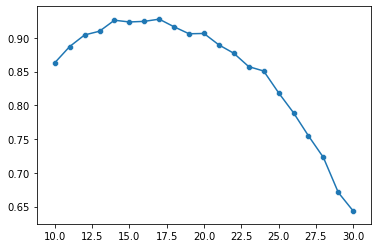

In [78]:
sns.lineplot(x=window_sizes, y=f_scores)
sns.scatterplot(x=window_sizes, y=f_scores)

In [79]:
X = df[[str(i) for i in range(90)] ]
y = df['is_stairs']

f_scores = []

for train_ix, valid_ix in kfold.split(X, y):
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    cls = svm.SVC()
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_valid)
    f_scores.append(f1_score(y_valid, y_pred))
    
print(f'F1 score mean: {round(np.mean(f_scores), 2)}, std: {round(np.std(f_scores), 2)}')

F1 score mean: 0.64, std: 0.07


In [80]:
X_train, X_valid = X_orig.loc[train_ix], X_orig.loc[valid_ix]
y_train, y_valid = y[train_ix], y[valid_ix]

In [81]:
X_train.shape

(1612, 90)

In [82]:
ts_frames = assemble_ts_parts(X_train)
ts_frames.shape

(1612, 3, 30)

In [88]:
window_size = 20
n_windows = FRAME_LENGTH - window_size + 1

In [89]:
X_train_extended = split_frames_to_windows(ts_frames)
X_train_extended = X_train_extended.reshape(len(X_train_extended), -1)
X_train_extended.shape

(17732, 60)

In [90]:
y_train_extended = np.tile(y_train, n_windows)
y_train_extended.shape

(17732,)

In [91]:
cls.fit(X_train_extended, y_train_extended)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
X_valid_extended = assemble_ts_parts(X_valid)
X_valid_extended = split_frames_to_windows(X_valid_extended, window_size=window_size)
X_valid_extended = X_valid_extended.reshape(len(X_valid_extended), -1)
X_valid_extended.shape

(4433, 60)

In [143]:
X_valid.shape

(403, 90)

In [144]:
y_pred_extended = cls.predict(X_valid_extended)

In [145]:
y_pred_extended.shape

(4433,)

In [148]:
y_pred = fold_predictions(y_pred_extended, n_windows=n_windows)
y_pred.shape

(403,)

In [149]:
y_valid.shape

(403,)

In [155]:
confusion_matrix(y_valid, y_pred>.5)

array([[345,  25],
       [ 30,   3]])

In [157]:
window_size = 20
threshold = .5
n_windows = FRAME_LENGTH - window_size + 1

X = df[[str(i) for i in range(90)] ]
y = df['is_stairs']

f_scores = []

for train_ix, valid_ix in kfold.split(X, y):
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    
    X_train_extended = split_frames_to_windows(ts_frames)
    X_train_extended = X_train_extended.reshape(len(X_train_extended), -1)
    y_train_extended = np.tile(y_train, n_windows)
    
    cls = svm.SVC()
    cls.fit(X_train_extended, y_train_extended)
    X_valid_extended = assemble_ts_parts(X_valid)
    X_valid_extended = split_frames_to_windows(X_valid_extended, window_size=window_size)
    X_valid_extended = X_valid_extended.reshape(len(X_valid_extended), -1)
    
    y_pred_extended = cls.predict(X_valid_extended)
    y_pred = fold_predictions(y_pred_extended, n_windows=n_windows)
    y_pred = y_pred > threshold
    f_scores.append(f1_score(y_valid, y_pred))
    
print(f'F1 score mean: {round(np.mean(f_scores), 2)}, std: {round(np.std(f_scores), 2)}')

F1 score mean: 0.09, std: 0.0


In [164]:
window_size = 30
threshold = .5
n_windows = FRAME_LENGTH - window_size + 1

X = df[[str(i) for i in range(90)] ]
y = df['is_stairs']

f_scores = []

for train_ix, valid_ix in kfold.split(X, y):
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    
    X_train_extended = split_frames_to_windows(ts_frames, window_size=window_size)
    X_train_extended = X_train_extended.reshape(len(X_train_extended), -1)
    y_train_extended = np.tile(y_train, n_windows)
    
    cls = svm.SVC()
    cls.fit(X_train_extended, y_train_extended)
    X_valid_extended = assemble_ts_parts(X_valid)
    X_valid_extended = split_frames_to_windows(X_valid_extended, window_size=window_size)
    X_valid_extended = X_valid_extended.reshape(len(X_valid_extended), -1)
    
    y_pred_extended = cls.predict(X_valid_extended)
    y_pred = fold_predictions(y_pred_extended, n_windows=n_windows)
    y_pred = y_pred > threshold
    f_scores.append(f1_score(y_valid, y_pred))
    
print(f'F1 score mean: {round(np.mean(f_scores), 2)}, std: {round(np.std(f_scores), 2)}')

(1612, 90)
(1612, 90)
(1612, 90)
(1612, 90)
(1612, 90)
F1 score mean: 0.74, std: 0.08


In [169]:
X = df[[str(i) for i in range(90)] ]
y = df['is_stairs']

f_scores = []

for train_ix, valid_ix in kfold.split(X, y):
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    cls = svm.SVC()
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_valid)
    f_scores.append(f1_score(y_valid, y_pred))
    
print(f'F1 score mean: {round(np.mean(f_scores), 2)}, std: {round(np.std(f_scores), 2)}')

F1 score mean: 0.64, std: 0.07


In [171]:
X = np.hstack([X[x_acc_cols].values, X[y_acc_cols].values, X[z_acc_cols].values ])

y = df['is_stairs']

f_scores = []

for train_ix, valid_ix in kfold.split(X, y):
    X_train, X_valid = X[train_ix], X[valid_ix]
    y_train, y_valid = y[train_ix], y[valid_ix]
    cls = svm.SVC()
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_valid)
    f_scores.append(f1_score(y_valid, y_pred))
    
print(f'F1 score mean: {round(np.mean(f_scores), 2)}, std: {round(np.std(f_scores), 2)}')

F1 score mean: 0.64, std: 0.07


In [193]:
window_size = 30
threshold = .5
n_windows = FRAME_LENGTH - window_size + 1

X = df[[str(i) for i in range(90)] ]
y = df['is_stairs']

f_scores = []

for train_ix, valid_ix in kfold.split(X, y):
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    ts_frames = assemble_ts_parts(X_train)
    X_train_extended = split_frames_to_windows(ts_frames, window_size=window_size)
    X_train_extended = X_train_extended.reshape(len(X_train_extended), -1)
    y_train_extended = np.tile(y_train, n_windows)
    
    cls = svm.SVC()
    cls.fit(X_train_extended, y_train_extended)
    X_valid_extended = assemble_ts_parts(X_valid)
    X_valid_extended = split_frames_to_windows(X_valid_extended, window_size=window_size)
    X_valid_extended = X_valid_extended.reshape(len(X_valid_extended), -1)
    
    y_pred_extended = cls.predict(X_valid_extended)
    y_pred = fold_predictions(y_pred_extended, n_windows=n_windows)
    y_pred = y_pred > threshold
    f_scores.append(f1_score(y_valid, y_pred))
    
print(f'F1 score mean: {round(np.mean(f_scores), 2)}, std: {round(np.std(f_scores), 2)}')

F1 score mean: 0.64, std: 0.07


In [441]:
window_size = 29
threshold = .5
n_windows = FRAME_LENGTH - window_size + 1

X = df[[str(i) for i in range(90)] ]
y = df['is_stairs']

f_scores = []

for train_ix, valid_ix in kfold.split(X, y):
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    ts_frames = assemble_ts_parts(X_train)
    X_train_extended = split_frames_to_windows(ts_frames, window_size=window_size)
    X_train_extended = X_train_extended.reshape(len(X_train_extended), -1)
    y_train_extended = np.tile(y_train, n_windows)
    
    cls = svm.SVC()
    cls.fit(X_train_extended, y_train_extended)
    X_valid_extended = assemble_ts_parts(X_valid)
    X_valid_extended = split_frames_to_windows(X_valid_extended, window_size=window_size)
    X_valid_extended = X_valid_extended.reshape(len(X_valid_extended), -1)
    
    y_pred_extended = cls.predict(X_valid_extended)
    y_pred = fold_predictions(y_pred_extended, n_windows=n_windows)
    y_pred = y_pred > threshold
    f_scores.append(f1_score(y_valid, y_pred))
    
print(f'F1 score mean: {round(np.mean(f_scores), 2)}, std: {round(np.std(f_scores), 2)}')

F1 score mean: 0.64, std: 0.07


In [442]:
window_size = 20
threshold = .5
n_windows = FRAME_LENGTH - window_size + 1

X = df[[str(i) for i in range(90)] ]
y = df['is_stairs']

f_scores = []

for train_ix, valid_ix in kfold.split(X, y):
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    ts_frames = assemble_ts_parts(X_train)
    X_train_extended = split_frames_to_windows(ts_frames, window_size=window_size)
    X_train_extended = X_train_extended.reshape(len(X_train_extended), -1)
    y_train_extended = np.tile(y_train, n_windows)
    
    cls = svm.SVC()
    cls.fit(X_train_extended, y_train_extended)
    X_valid_extended = assemble_ts_parts(X_valid)
    X_valid_extended = split_frames_to_windows(X_valid_extended, window_size=window_size)
    X_valid_extended = X_valid_extended.reshape(len(X_valid_extended), -1)
    
    y_pred_extended = cls.predict(X_valid_extended)
    y_pred = fold_predictions(y_pred_extended, n_windows=n_windows)
    y_pred = y_pred > threshold
    f_scores.append(f1_score(y_valid, y_pred))
    
print(f'F1 score mean: {round(np.mean(f_scores), 2)}, std: {round(np.std(f_scores), 2)}')

F1 score mean: 0.9, std: 0.04


In [262]:
def assemble_ts_parts_arr(X):
    x_part = X[:, np.arange(30)]
    y_part = X[:, np.arange(30, 60)]
    z_part = X[:, np.arange(60, 90)]
    features = np.stack([x_part, y_part, z_part], axis=1)
    
    return features

In [297]:
class FramingSVMClassifier:
    def __init__(self, window_size, frame_length=FRAME_LENGTH):
        self.window_size  = window_size
        self.frame_length = frame_length
        self.n_windows    = frame_length - window_size + 1
        self.threshold = .5
        
    def expand_X(self, X):
        X_expanded = assemble_ts_parts_arr(X)
        X_expanded = split_frames_to_windows(X_expanded, window_size=self.window_size)
        X_expanded = X_expanded.reshape(len(X_expanded), -1)
        return X_expanded
    
    def expand_y(self, y):
        return np.tile(y, self.n_windows)
    
    def fold_preds(self, y_expanded):
        y_pred = fold_predictions(y_expanded, n_windows=self.n_windows)
        return y_pred
        
    def fit(self, X, y):
        X_expanded = self.expand_X(X)
        y_expanded = self.expand_y(y)
        self.cls = svm.SVC()
        self.cls.fit(X_expanded, y_expanded)
        
    def predict_proba(self, X):
        X_expanded = self.expand_X(X)
        y_expanded = self.cls.predict(X_expanded)
        y_pred = self.fold_preds(y_expanded)
        return y_pred
        
        
    def predict(self, X):
        y_average = self.predict_proba(X)
        return y_average >= self.threshold
    
        
        

In [433]:
class FramingTransformer:
    def __init__(self, window_size, frame_length=FRAME_LENGTH):
        self.window_size  = window_size
        self.frame_length = frame_length
        self.n_windows    = frame_length - window_size + 1
#         self.threshold = .5
        
    def expand_X(self, X):
        X_expanded = X.reshape(len(X), -1, self.frame_length)#assemble_ts_parts_arr(X)
        X_expanded = split_frames_to_windows(X_expanded, window_size=self.window_size)
        X_expanded = X_expanded.reshape(len(X_expanded), -1)
        return X_expanded
    
    def expand_y(self, y):
        return np.tile(y, self.n_windows)
    
    def fold_preds(self, y_expanded):
        y_pred = fold_predictions(y_expanded, n_windows=self.n_windows)
        return y_pred
        
    def expand(self, X, y=None):
        X_expanded = self.expand_X(X)
        if y is not None:
            y_expanded = self.expand_y(y)
            return X_expanded, y_expanded
        return X_expanded
    
        
        

In [434]:
frm = FramingTransformer(window_size=2, frame_length=3)

In [435]:
np.random.seed(1)
sample_y = np.array([1, 0])
sample_X = np.random.randint(6, size=(2,6))
sample_X

array([[5, 3, 4, 0, 1, 3],
       [5, 0, 0, 1, 4, 5]])

In [436]:
frm.expand_X(sample_X)

array([[5, 3, 0, 1],
       [5, 0, 1, 4],
       [3, 4, 1, 3],
       [0, 0, 4, 5]])

In [437]:
frm.expand(sample_X, sample_y)

(array([[5, 3, 0, 1],
        [5, 0, 1, 4],
        [3, 4, 1, 3],
        [0, 0, 4, 5]]),
 array([1, 0, 1, 0]))

In [401]:
X_expanded = split_frames_to_windows(X_expanded, window_size=2)


In [402]:
X_expanded.shape


(2, 3, 2)

In [394]:
sample_X.shape

(2, 6)

In [395]:
frm.n_windows

2

(4, 4)

array([[5, 3, 4, 0, 1, 3],
       [5, 0, 0, 1, 4, 5]])

In [264]:
X = np.hstack([df[x_acc_cols].values, df[y_acc_cols].values, df[z_acc_cols].values ])
train_ix, valid_ix = list(kfold.split(X, y))[0]

In [265]:
X_train, X_valid = X[train_ix], X[valid_ix]
y_train, y_valid = y[train_ix], y[valid_ix]

In [301]:
cls = svm.SVC()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_valid)
print(f1_score(y_valid, y_pred))

0.7272727272727273


In [269]:
cls = FramingSVMClassifier(window_size=30)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_valid)
print(f1_score(y_valid, y_pred))

0.7272727272727273


In [292]:
X_expanded = cls.expand_X(X)
y_expanded = cls.expand_y(y)
svm_cls = svm.SVC()
svm_cls.fit(X_expanded, y_expanded)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [294]:
X_expanded.shape

(4030, 87)

In [295]:
y_expanded.shape

(4030,)

In [285]:
X_expanded.shape

(2015, 180)

In [286]:
cls.expand_X(X_train).shape

(3224, 87)

In [303]:
cls = FramingSVMClassifier(window_size=25)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_valid)
print(f1_score(y_valid, y_pred))

0.15151515151515152


In [304]:
confusion_matrix(y_valid, y_pred)

array([[342,  28],
       [ 28,   5]])

In [300]:
cls.predict_proba(X_valid)

array([1. , 1. , 0.5, 0.5, 0.5, 1. , 1. , 0.5, 0.5, 0.5, 0. , 1. , 0. ,
       1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

In [302]:
y_pred

array([ True,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False, False,  True,  True, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [184]:
ts_frames = assemble_ts_parts(X_train)

In [188]:
X_train.iloc[0]

0      0.675165
1    -11.607090
2     -2.662352
3     -1.278504
4     -2.700659
        ...    
85    -6.320692
86     9.255983
87     1.747767
88     2.920926
89     7.910443
Name: 0, Length: 90, dtype: float64

In [186]:
ts_frames[0]

array([[  0.675165,  -1.278504,  -4.424484,   0.646435,  -1.623269,
         -4.323928,  -5.228936,  -3.08852 ,  -3.021482, -11.238382,
         -0.488417,  -7.675811,  -0.521936,  -3.715801,  -1.666364,
         -6.354211,  -3.940856,  -1.240196, -10.228029,  -1.043872,
         -6.411672, -10.070012,  -7.929596,  -1.929727,  -4.458003,
         -4.13718 ,   1.82917 ,  -7.350199,   3.969586,   1.747767],
       [-11.60709 ,  -2.700659, -10.726024,  -0.641646,  -6.603208,
         -2.671929,  -3.557784, -14.130578,  -8.39886 , -12.018892,
         -9.356541, -17.00362 ,   0.708684,  -5.645528,  -9.121908,
         -5.717354, -12.717999, -10.414778, -14.465767, -13.603854,
        -11.836933, -15.049952, -12.253524,  -2.806004,  -6.780379,
         -4.429273,  -9.313444, -12.670115,  -6.320692,   2.920926],
       [ -2.662352,   0.924162,  -1.082179,  -1.04866 ,   0.071826,
          3.485958,  -0.038307,   0.215478,   1.312023,  -2.762909,
          0.11971 ,  -1.546654,  -5.051765,   